<h1 align="center"> 🔍👥📊 Customer Segmentation </h1>

### 🧠 Customer Segmentation

#### 📌 Problem  
Businesses often treat all customers the same, missing the opportunity to **tailor marketing strategies** to specific customer needs. Without segmentation, it’s difficult to understand **who your customers are**, how they behave, and how to engage them effectively, leading to **inefficient marketing efforts** and lost revenue.


In [1]:
import matplotlib.pyplot as plt
import pandas as pd 
import morethemes as mt
mt.set_theme("ft")
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
X_scaled = data[["Annual Income (k$)","Spending Score (1-100)"]]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_scaled)
X_scaled[0]

array([-1.73899919, -0.43480148])

In [4]:
kmeans = KMeans(n_clusters=5,random_state=42)
kmeans.fit(X_scaled)

KMeans(n_clusters=5, random_state=42)

In [5]:
labels = kmeans.labels_
centers = kmeans.cluster_centers_
data['Cluster'] = labels

In [6]:
centers

array([[-0.20091257, -0.02645617],
       [ 0.99158305,  1.23950275],
       [-1.32954532,  1.13217788],
       [ 1.05500302, -1.28443907],
       [-1.30751869, -1.13696536]])

In [7]:
labels[0:10]

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2], dtype=int32)

In [8]:
import plotly.express as px

# Create a 2D scatter plot
fig = px.scatter(
    data,
    x='Annual Income (k$)',           # X_scaled-axis variable
    y='Spending Score (1-100)',       # Y-axis variable
    color='Cluster',                  # Color by cluster
    title='Customer Segmentation by Income and Spending Score',
    labels={
        'Annual Income (k$)': 'Annual Income (k$)',
        'Spending Score (1-100)': 'Spending Score (1-100)'
    },
    hover_data=['Gender'],            # Show gender on hover
    size_max=25                       # Maximum point size
)

# Customize the layout
fig.update_layout(
    showlegend=True,
    title_x=0.5,
    legend_title_text='Cluster',
    xaxis_title='Annual Income (k$)',
    yaxis_title='Spending Score (1-100)',
    font=dict(size=15,family="Arial",color="Black"),
    width=800,
    height=600
)

# Display the plot
fig.show()

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Calculate Inertia (WCSS)
inertia = kmeans.inertia_
print(f"Inertia (WCSS) is : {inertia:.2f}")
# Interpretation: Lower values mean points are closer to their centroids.

# Calculate Silhouette Score
silhouette = silhouette_score(X_scaled, labels)
print(f"Silhouette Score is : {silhouette:.3f}")
# Interpretation: Close to 1 = good clusters, close to 0 = ambiguous, negative = poor clustering.

# Calculate Davies-Bouldin Index
db_score = davies_bouldin_score(X_scaled, labels)
print(f"Davies-Bouldin Index is : {db_score:.3f}")
# Interpretation: Lower values indicate more compact and better-separated clusters.

# Calculate Calinski-Harabasz Index
ch_score = calinski_harabasz_score(X_scaled, labels)
print(f"Calinski-Harabasz Index is : {ch_score:.2f}")
# Interpretation: Higher values indicate denser and well-separated clusters.

Inertia (WCSS): 65.57
Silhouette Score: 0.555
Davies-Bouldin Index: 0.572
Calinski-Harabasz Index: 248.65


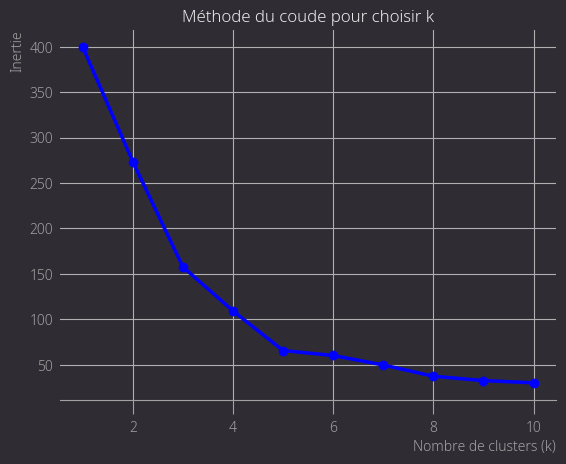

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd


inertias = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Visualise the curve
plt.plot(K_range, inertias, 'bo-')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Inertie')
plt.title("Méthode du coude pour choisir k")
plt.grid(True)
plt.show()


In [10]:
data["Cluster"].value_counts()

Cluster
0    81
1    39
3    35
4    23
2    22
Name: count, dtype: int64

In [11]:
data.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()


,Annual Income (k$),Spending Score (1-100)
Cluster,,
0,55.296296,49.518519
1,86.538462,82.128205
2,25.727273,79.363636
3,88.200000,17.114286
4,26.304348,20.913043


In [12]:
# add a new column 'Segment' to the DataFrame based on the cluster labels
data['Segment'] = data['Cluster'].map({
    0: 'Cautious',
    1: 'Big Spenders',
    2: 'Average Customers',
    3: 'Low Income',
    4: 'VIP'
})
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster,Segment
0,1,Male,19,15,39,4,VIP
1,2,Male,21,15,81,2,Average Customers
2,3,Female,20,16,6,4,VIP
3,4,Female,23,16,77,2,Average Customers
4,5,Female,31,17,40,4,VIP
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,1,Big Spenders
196,197,Female,45,126,28,3,Low Income
197,198,Male,32,126,74,1,Big Spenders
198,199,Male,32,137,18,3,Low Income


In [13]:
segment =data["Segment"].value_counts(normalize=True)*100
segment

Segment
Cautious             40.5
Big Spenders         19.5
Low Income           17.5
VIP                  11.5
Average Customers    11.0
Name: proportion, dtype: float64

In [14]:
import plotly.express as px

df_segment = segment.reset_index()
df_segment.columns = ['Segment', 'Pourcentage']
fig = px.pie(
    df_segment, 
    names='Segment', 
    values='Pourcentage', 
    title='Repartition of segments',
    hole=0.5  
)
fig.update_layout(
    height=None,
    width=None,
    title_x=0.45,
    legend_title_text='Cluster',
    font=dict(size=15,family="Arial",color="Black")
)
fig.show()


In [15]:
data.groupby('Cluster')["Annual Income (k$)"].mean()

Cluster
0    55.296296
1    86.538462
2    25.727273
3    88.200000
4    26.304348
Name: Annual Income (k$), dtype: float64

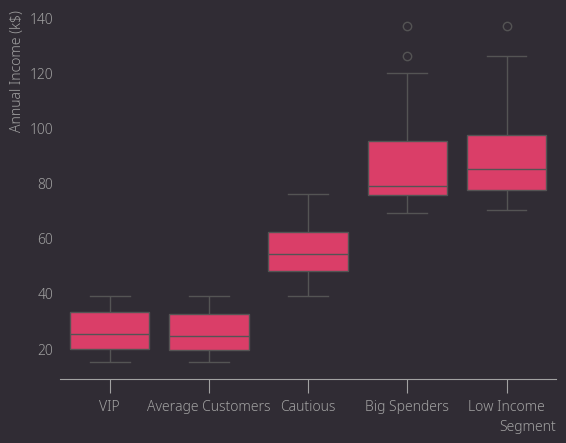

In [16]:
import seaborn as sns
sns.boxplot(x='Segment', y='Annual Income (k$)', data=data)
plt.show()


#### ✅ Solution  
This project uses **unsupervised learning (K-Means clustering)** to segment customers based on features like **annual income** and **spending score**. The goal is to uncover **distinct customer groups** that can guide **personalized marketing strategies**. The results are supported by **interactive visualizations** for easy interpretation and actionab


### 🔍 Methodologies

- **Data Cleaning & Preprocessing**  
  Handled missing values, removed duplicates, and standardized feature scales to prepare the dataset.

- **Feature Selection**  
  Selected relevant features such as annual income, spending score, age, and other demographics for clustering.

- **Exploratory Data Analysis (EDA)**  
  Used visualizations (scatter plots, histograms) and statistical summaries to understand feature distributions and relationships.

- **Clustering Algorithm**  
  Applied **K-Means clustering** to segment customers into distinct groups based on their behavior and attributes.

- **Determining Optimal Clusters**  
  Used methods like the **Elbow Method** and **Silhouette Score** to identify the best number of clusters.

- **Cluster Profiling**  
  Analyzed and interpreted each cluster’s characteristics to define customer personas and target marketing strategies.

- **Visualization**  
  Created interactive plots (2D scatter plots) to visualize clusters and aid interpretation.

